In [1]:
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### 1. Prepare the data

In [11]:
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)

/opt/anaconda3/envs/goormthon/lib/python3.9/site-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [17]:
x_data = X["LSTAT"] # 주변 이웃 중 하위 계층의 비율
y_data = y # 집의 가격 (in $1,000s)
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


#### 2. Build the model

In [18]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b 

#### 3. Set the criterion

In [19]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

#### 4. Train the model

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(10000):
        sess.run(train)
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()

    w_out, b_out = sess.run([w, b]) 

2024-07-02 13:55:41.031706: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


Step 0: w [1.2871854] b [-0.23385201]
loss 335.20654296875

Step 1000: w [0.34160265] b [13.039654]
loss 150.1302032470703

Step 2000: w [-0.15143968] b [21.251932]
loss 81.16313934326172

Step 3000: w [-0.45628238] b [26.329494]
loss 54.79848861694336

Step 4000: w [-0.6447609] b [29.468855]
loss 44.71999740600586

Step 5000: w [-0.7612942] b [31.409872]
loss 40.86722946166992

Step 6000: w [-0.8333446] b [32.609966]
loss 39.3944206237793

Step 7000: w [-0.8778926] b [33.35198]
loss 38.83138656616211

Step 8000: w [-0.90543467] b [33.810726]
loss 38.61616897583008

Step 9000: w [-0.9224643] b [34.094376]
loss 38.53388977050781



#### 5. Visualize trained model

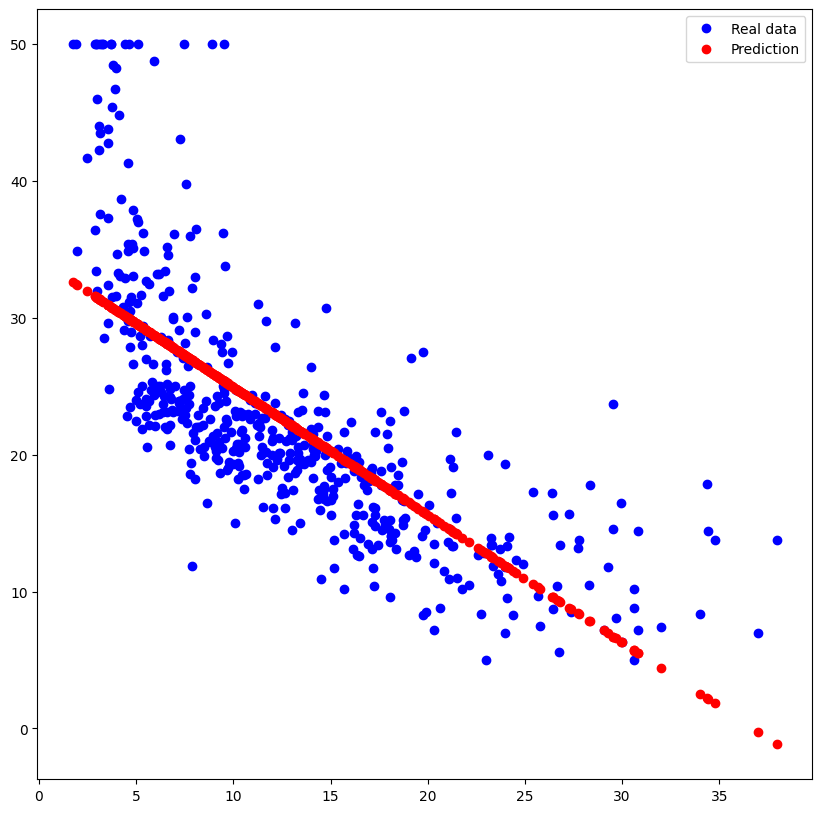

In [21]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

#### + Appendix. Gradient Descent 단계마다 Trained model 그리기(Plotting)

In [10]:
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer()) 

#     for step in range(10000):
#         sess.run(train)
#         if step % 1000 == 0:
#             print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
#             print('loss {}'.format(sess.run(loss)))
            
#             plt.figure(figsize = (10,10))
#             plt.plot(x_data, y_data, 'bo', label='Real data')
#             plt.plot(x_data, x_data * sess.run(w) + sess.run(b), 'ro', label='Prediction')
#             plt.legend()
#             plt.show()
#             print()

#     w_out, b_out = sess.run([w, b]) 